# Facebook Word Cloud

An attempt to visualize a facebook conversation through word clouds.

The project uses the following libraries:
- json
- nltk
- googletrans
- collections
- matplotlib
- cv2
- random
- datetime
- emoji
- pandas
- seaborn
- numpy

**Luke Clark M. Andrada**

**Load the json file.**

In [1]:
import json

with open('ynna.json') as file:
    data = json.load(file)

# data

**Divide content to users.**

In [2]:
ynna = []
clark = []

for message in data['messages']:
    if 'content' in message:
        if message['sender_name'] == 'Ynna Denice Esguerra':
            ynna.append(message['content'])
        else:
            clark.append(message['content'])

print(len(ynna), len(clark))
# ynna

1359 1176


**Split content into words.**

In [3]:
from nltk.tokenize import word_tokenize

ynna_words = []
clark_words = []
users = [ynna, clark]
words = [ynna_words, clark_words]

for user, word in zip(users, words):
    for content in user:
        tokens = word_tokenize(content)
        word.extend(tokens)

print(len(ynna_words), len(clark_words))
# ynna_words

52749 51663


**Translate stop words.**

In [ ]:
from googletrans import Translator
from nltk.corpus import stopwords

translator = Translator()
stop_words_en = set(stopwords.words('english'))
stop_words_entl = []

translations = translator.translate(list(stop_words_en), dest='tl')

for translation in translations:
    stop_words_entl.append(translation.text)

stop_words_entl

In [ ]:
stop_words_entl_clean = []

for word in stop_words_entl:
    if " " not in word and "'" not in word:
        stop_words_entl_clean.append(word)

stop_words_entl_clean.sort()
stop_words_entl = set(stop_words_entl_clean)
stop_words_entl

**Delete stop words and transfer emojis.**

In [4]:
from nltk.corpus import stopwords

with open('stopwords.json') as file:
    stop_words_tl = json.load(file)

with open('stopwords_entl.json') as file:
    stop_words_entl = json.load(file)
    
with open('stopwords_more.json') as file:
    stop_words_more = json.load(file)

stop_words_tl = set(stop_words_tl)
stop_words_en = set(stopwords.words('english'))
stop_words = stop_words_tl.union(stop_words_en)
stop_words = stop_words.union(stop_words_entl)
stop_words = stop_words.union(stop_words_more)

ynna_clean = [word for word in ynna_words if word not in stop_words and len(word) > 3]
clark_clean = [word for word in clark_words if word not in stop_words and len(word) > 3]

ynna_emoji = []
clark_emoji = []
cleans = [ynna_clean, clark_clean]
emojis = [ynna_emoji, clark_emoji]

for clean, emoji in zip(cleans, emojis):
    for word in clean:
        if r'\x' in word.encode('unicode-escape').decode('utf-8', 'strict'):
            clean.remove(word)
            emoji.append(word)

print(len(ynna_clean), len(clark_clean))
print(len(ynna_emoji), len(clark_emoji))
# ynna_clean

18446 18034
350 187


**Count word and emoji frequency.**

In [5]:
from collections import Counter

ynna_word_count = Counter(ynna_clean)
clark_word_count = Counter(clark_clean)

ynna_emoji_count = Counter(ynna_emoji)
clark_emoji_count = Counter(clark_emoji)

print(len(ynna_word_count), len(clark_word_count))
print(len(ynna_emoji_count), len(clark_emoji_count))
# ynna_word_count

6954 6308
60 33


**Sort word and emoji frequency**

In [6]:
ynna_word_sorted = sorted(ynna_word_count.items(), key=lambda word: word[1], reverse=True)
clark_word_sorted = sorted(clark_word_count.items(), key=lambda word: word[1], reverse=True)

clark_emoji_sorted = sorted(clark_emoji_count.items(), key=lambda word: word[1], reverse=True)
ynna_emoji_sorted = sorted(ynna_emoji_count.items(), key=lambda word: word[1], reverse=True)

print(len(ynna_word_sorted), len(clark_word_sorted))
print(len(ynna_emoji_sorted), len(clark_emoji_sorted))
# ynna_word_sorted

6954 6308
60 33


**Calculate total word count.**

In [7]:
ynna_dict = dict(ynna_word_sorted)
clark_dict = dict(clark_word_sorted)

total = {}
users = [ynna_word_sorted, clark_word_sorted]

for user in users:
    for word in user:
        if word[0] in total:
            total[word[0]] += word[1]
        else:
            total[word[0]] = word[1]

total_sorted = sorted(total.items(), key=lambda word: word[1], reverse=True)

print(len(total_sorted))
# total_sorted

10274


**Visualize through word cloud.**

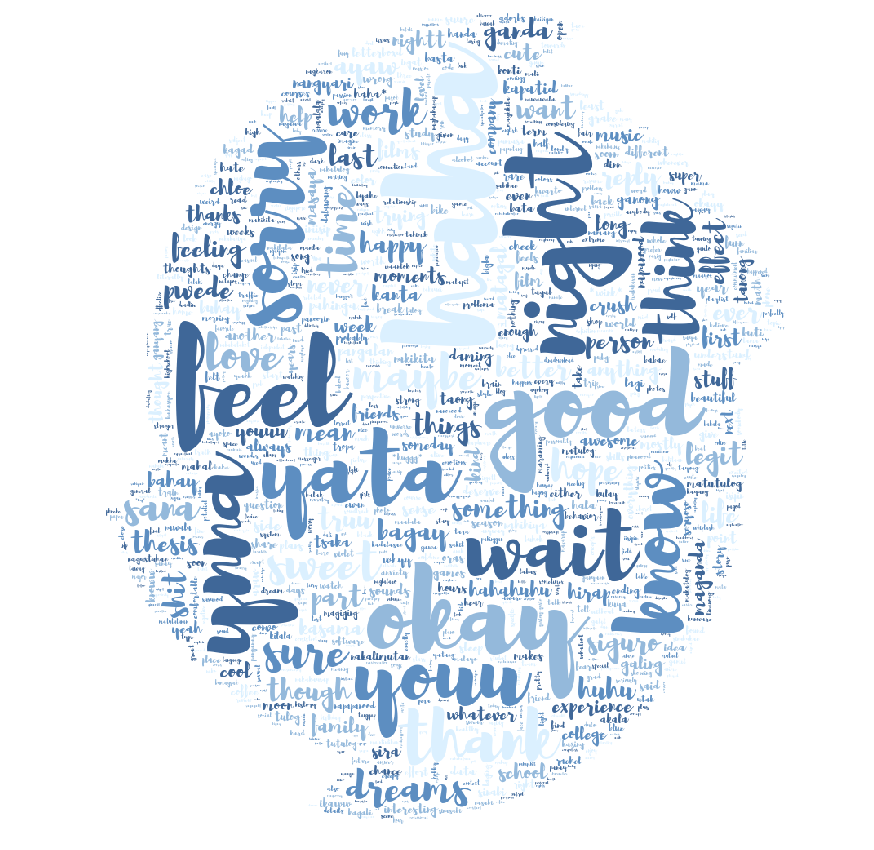

In [8]:
%matplotlib inline

import wordcloud as wc
import matplotlib.pyplot as plt
import cv2
import random

def clark_color(*args, **kwargs):
    flag = random.randint(1, 4)
    if flag == 1: return (219, 240, 255)
    elif flag == 2: return (148, 185, 219)
    elif flag == 3: return (93, 142, 193)
    else: return (63, 103, 152)

clark_photo = cv2.imread('clark.png', 0)

clark_cloud = wc.WordCloud(
    font_path="Brusher-Regular.ttf",
    mask=clark_photo,
    max_words=1000,
    color_func=clark_color,
    background_color="white",
    relative_scaling=0.2,
    colormap='PuBu'
    ).generate_from_frequencies(clark_dict)

plt.figure(figsize=(15, 15))
plt.imshow(clark_cloud)
plt.axis('off')
plt.show()

In [ ]:
clark_cloud.to_file('clark_cloud.png')

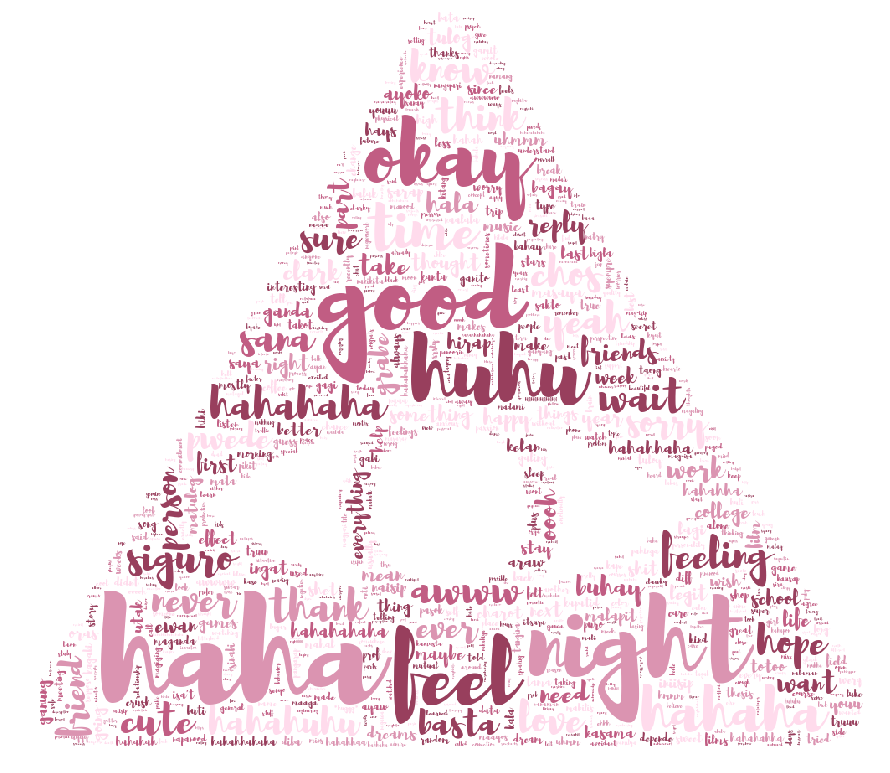

In [9]:
%matplotlib inline

import wordcloud as wc
import matplotlib.pyplot as plt
import cv2

def ynna_color(*args, **kwargs):
    flag = random.randint(1, 4)
    if flag == 1: return (255, 219, 236)
    elif flag == 2: return (219, 148, 177)
    elif flag == 3: return (193, 93, 131)
    else: return (152, 63, 93)

ynna_photo = cv2.imread('ynna.png', 0)

ynna_cloud = wc.WordCloud(
    font_path="Brusher-Regular.ttf",
    mask=ynna_photo,
    max_words=1000,
    color_func=ynna_color,
    background_color="white",
    relative_scaling=0.2,
    colormap='PuRd'
    ).generate_from_frequencies(ynna_dict)

plt.figure(figsize=(15, 15))
plt.imshow(ynna_cloud)
plt.axis('off')
plt.show()

In [ ]:
ynna_cloud.to_file('ynna_cloud.png')

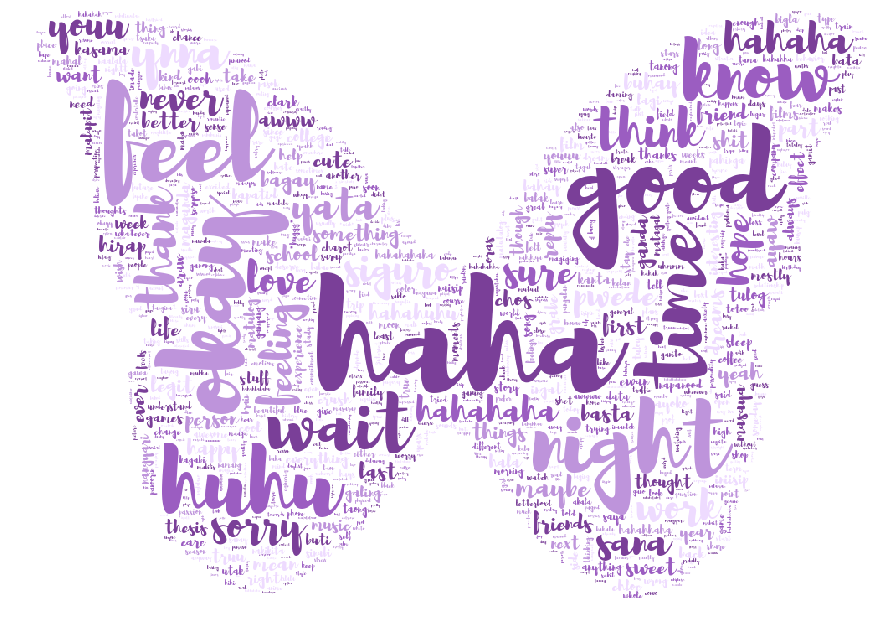

In [10]:
%matplotlib inline

import wordcloud as wc
import matplotlib.pyplot as plt
import cv2

def total_color(*args, **kwargs):
    flag = random.randint(1, 4)
    if flag == 1: return (238, 219, 255)
    elif flag == 2: return (190, 148, 219)
    elif flag == 3: return (155, 93, 193)
    else: return (122, 63, 152)

total_photo = cv2.imread('total.png', 0)
total_dict = dict(total_sorted)

total_cloud = wc.WordCloud(
    font_path="Brusher-Regular.ttf",
    mask=total_photo,
    max_words=1000,
    color_func=total_color,
    background_color="white",
    relative_scaling=0.2,
    ).generate_from_frequencies(total_dict)

plt.figure(figsize=(15, 15))
plt.imshow(total_cloud)
plt.axis('off')
plt.show()

In [ ]:
total_cloud.to_file('total_cloud.png')

**Calculate statistics.**

In [11]:
from datetime import datetime

timestamp = []
for message in data['messages']:
    timestamp.append(message['timestamp_ms'])

time_start = datetime.fromtimestamp(int(timestamp[-1] / 1000))
time_end = datetime.fromtimestamp(int(timestamp[0] / 1000))
time_days = time_end - time_start

str_start = datetime.strftime(time_start, '%b %d, %Y')
str_end = datetime.strftime(time_end, '%b %d, %Y')
str_days = time_days.days

print('From: {}'.format(str_start))
print('To: {}'.format(str_end))
print('Total Days: {}'.format(str_days))

From: Dec 26, 2016
To: Jul 27, 2018
Total Days: 577


In [12]:
total_msgs = len(data['messages'])
total_days = int(str_days)
average_mpd = total_msgs / total_days

print('Total Messages: {}'.format(total_msgs))
print('Average Messages Per Day: {:.2f}'.format(average_mpd))

Total Messages: 2641
Average Messages Per Day: 4.58


In [13]:
total_words = len(ynna_words) + len(clark_words)
wpm = []

for user, word in zip(users, words):
    wpm.append(len(word) / len(user))
    
average_wpm = (wpm[0] + wpm[1]) / 2
average_wpd = total_words / total_days

print('Total Words: {}'.format(total_words))
print('Average Words Per Message: {:.2f}'.format(average_wpm))
print('Average Words Per Day: {:.2f}'.format(average_wpd))

Total Words: 104412
Average Words Per Message: 7.89
Average Words Per Day: 180.96


In [14]:
letters = []
lpw = []

for word in words:
    chars = 0
    for each in word:
        chars += len(each)
    letters.append(chars)
    lpw.append(chars / len(word))

total_letters = letters[0] + letters[1]
average_lpw = (lpw[0] + lpw[1]) / 2
average_lpm = total_letters / total_msgs
average_lpd = total_letters / total_days

print('Total Letters: {}'.format(total_letters))
print('Average Letters Per Word: {:.2f}'.format(average_lpw))
print('Average Letters Per Message: {:.2f}'.format(average_lpm))
print('Average Letters Per Day: {:.2f}'.format(average_lpd))

Total Letters: 409043
Average Letters Per Word: 3.92
Average Letters Per Message: 154.88
Average Letters Per Day: 708.91


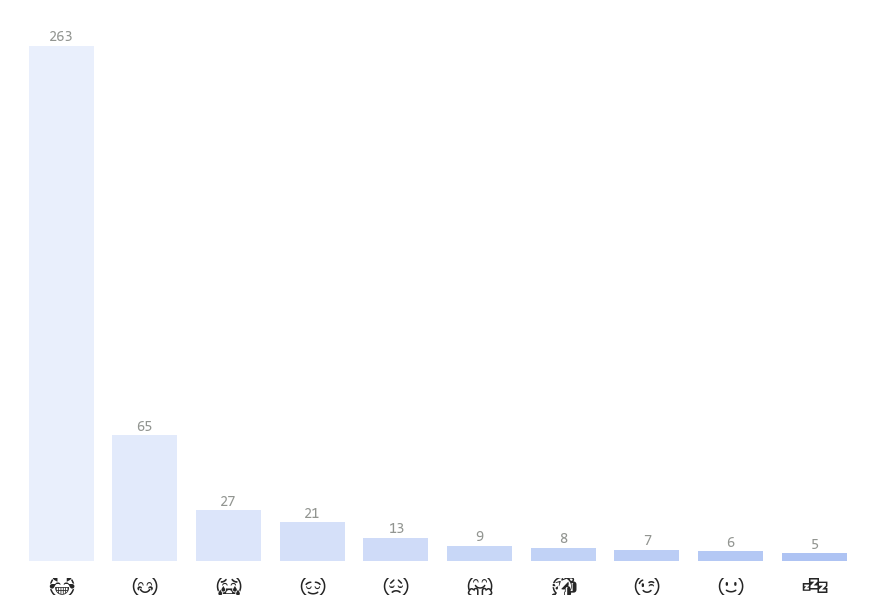

In [17]:
# -*- coding: utf-8 -*-
%matplotlib inline
import emoji as emo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from __future__ import unicode_literals

total_emoji_clean = []
for user in emojis:
    for emoji in user:
        try:
            total_emoji_clean.append(emoji.encode('raw_unicode_escape').decode('utf-8'))
        except:
            pass

total_emoji_dict = {}
for emoji in emo.UNICODE_EMOJI:
    if emoji in total_emoji_clean:
        for content in total_emoji_clean:
            if emoji in content:
                if emoji in total_emoji_dict:
                    total_emoji_dict[emoji] += 1
                else:
                    total_emoji_dict[emoji] = 1
                
total_emoji_sorted = sorted(total_emoji_dict.items(), key=lambda emoji: emoji[1], reverse=True)
total_emoji_df = pd.DataFrame(list(total_emoji_sorted), columns=['emoji', 'count'])

fig, ax = plt.subplots(figsize=(15, 10))
sns.set(style='ticks', context='poster')
sns_plot = sns.barplot(ax=ax, x='emoji', y='count', data=total_emoji_df[:10], palette=sns.light_palette('pastel blue', 10, input='xkcd'))
sns.set_style({'xtick.bottom': False,
               'ytick.left': False})
for tick in ax.get_xticklabels():
    tick.set_fontname('Segoe UI Emoji')
ax.axes.get_yaxis().set_visible(False)
sns.despine(left=True, bottom=True)
ax.set_ylabel('')    
ax.set_xlabel('')
for index, count in enumerate(list(total_emoji_df['count'][:10])):
    ax.text(index, count + 2, str(count), color='xkcd:grey', fontsize=15, fontname='Consolas', ha='center')
sns_fig = sns_plot.get_figure()
sns_fig.savefig('emoji.png')

In [16]:
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

test = json_normalize(data['messages'])
counts = test.count()
print('Audios: {}'.format(counts['audio_files']))
print('Calls: {}'.format(counts['call_duration']))
print('Files: {}'.format(counts['files']))
print('Gifs: {}'.format(counts['gifs']))
print('Reactions: {}'.format(counts['reactions']))
print('Stickers: {}'.format(counts['sticker.uri']))
print('Videos: {}'.format(counts['videos']))

Audios: 5
Calls: 6
Files: 3
Gifs: 6
Reactions: 65
Stickers: 29
Videos: 8
